# OSCILLAZIONI FORZATE

In [5]:
import numpy as np
import pandas as pd
import os

dir_path = os.path.abspath('')
FILE = dir_path + '/../CSV/' + 'oscillazioni_forzate_smorzate.csv'
fr = pd.read_csv(FILE)

omega = np.array(fr['omegaf']) # rad/s
A = np.array(fr['A']) * 0.01 # m

## interpolazione $A(\omega)$

$A(\omega) = \frac{M}{\sqrt{(\omega_0^2 - \omega^2)^2 + 4\gamma^2\omega^2}}$

NOTA: vengono trascurati le incertezze sul valore di $\omega$, nel set di dati è riportato sia $\omega_f$ che $\omega$ misurato attraverso il periodo. Successivamente aggiungeremmo la trattazione dell'incertezza su $\omega$

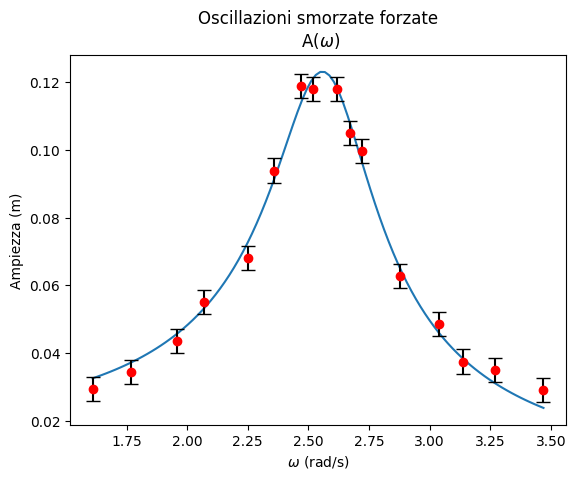

   
Parameters: {'M': 0.13329225671612313, 'w0': 2.575431727895482, 'gamma': 0.21088267994139445} 
Sigma parameters: {'M': 0.004800892879308666, 'w0': 0.008324208919322604, 'gamma': 0.010335886351295157}

sigmaY: 0.003552784139295273

covariance matrix: [[1.52156591e-05 6.30005426e-06 2.99961383e-05]
 [6.30005426e-06 4.57438467e-05 1.14646632e-05]
 [2.99961383e-05 1.14646632e-05 7.05248531e-05]]    

omega_0:  2.575 ± 0.008 
gamma:  0.211 ± 0.01 


In [6]:
from interpolazione3 import Interpolazione, final_val
from matplotlib import pyplot as plt

def A_w(w, M, w0, gamma):
    return M/np.sqrt((w0**2 - w**2)**2 + 4 * gamma**2 * w**2)

r = Interpolazione(omega,A,A_w,names=['M','w0','gamma'])

plt.plot(r.x_best, r.y_best)
plt.errorbar(omega,A,yerr=r.sigmaY,fmt='o',color='red',ecolor="black",capsize=5)
plt.title('Oscillazioni smorzate forzate\n A($\omega$)')
plt.ylabel("Ampiezza (m)")
plt.xlabel("$\omega$ (rad/s)")
plt.show()

print(r)
print('omega_0: ', final_val(r.bval['w0'],r.sigma_bval['w0'],decimals=3))
print('gamma: ', final_val(r.bval['gamma'],r.sigma_bval['gamma'],decimals=3))

### incertezze su $\omega$

disegno il grafico della differenza tra $\omega$ e $\omega_f$ per verificare che gli errori siano distributi casualmente (Se non lo fossero si avrebbe una regione sistematicamente maggiore delle altre)

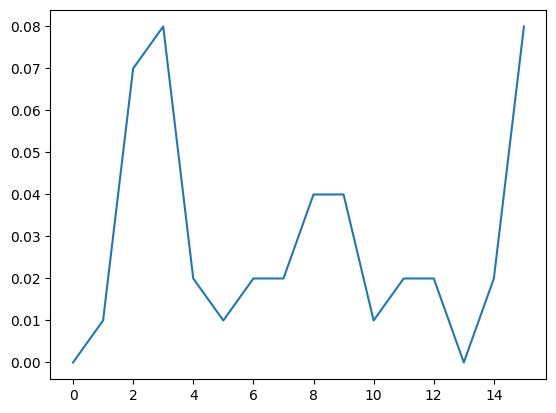

In [7]:

omega = np.array(fr['omega']) # rad/s
omegaf = np.array(fr['omegaf']) # rad/s

h = np.abs(omegaf - omega)

plt.plot(h)
plt.show()